# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
# Melakukan import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:

# Memuat dataset
df = pd.read_csv("personality_raw.csv")
df.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Deskripsi Variabel

In [3]:
# Informasi umum pada df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
# analisis statistik
df.describe(include='all')

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2900.000000,2900,2900.000000,2900.000000,2900,2900.000000,2900.000000,2900
unique,NaN,2,NaN,NaN,2,NaN,NaN,2
top,NaN,No,NaN,NaN,No,NaN,NaN,Extrovert
freq,NaN,1490,NaN,NaN,1493,NaN,NaN,1491
mean,4.505816,NaN,3.963354,3.000000,NaN,6.268863,3.564727,NaN
std,3.441180,NaN,2.872608,2.221597,NaN,4.232340,2.893587,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,2.000000,NaN,2.000000,1.000000,NaN,3.000000,1.000000,NaN
50%,4.000000,NaN,3.963354,3.000000,NaN,5.000000,3.000000,NaN
75%,7.000000,NaN,6.000000,5.000000,NaN,10.000000,6.000000,NaN


## Identifikasi Missing Value dan Duplikat

In [5]:
# Cek apakah ada baris duplikat
duplicates = df[df.duplicated()]

# Tampilkan jumlah dan isi duplikat
print(f"Jumlah baris duplikat: {len(duplicates)}")
display(duplicates)

Jumlah baris duplikat: 402


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
47,10.0,Yes,1.0,2.0,Yes,2.0,0.0,Introvert
217,5.0,Yes,2.0,0.0,Yes,2.0,0.0,Introvert
246,9.0,Yes,0.0,1.0,Yes,2.0,1.0,Introvert
248,9.0,Yes,0.0,2.0,Yes,3.0,2.0,Introvert
254,7.0,Yes,0.0,0.0,Yes,3.0,2.0,Introvert
...,...,...,...,...,...,...,...,...
2884,11.0,Yes,0.0,2.0,Yes,3.0,1.0,Introvert
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert


In [6]:
# Cek jumlah missing values per kolom
missing_data = df.isnull().sum()

# Tampilkan hanya kolom yang memiliki missing values
missing_data = missing_data[missing_data > 0]

# Tampilkan hasil
print("Jumlah missing values per kolom:")
print(missing_data)

Jumlah missing values per kolom:
Series([], dtype: int64)


## Distribusi Kelas

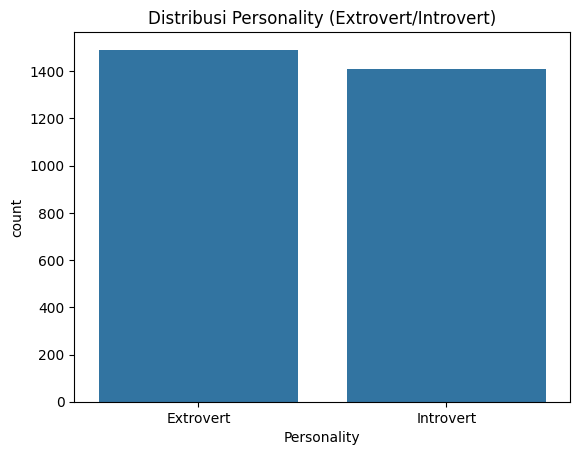

In [7]:
# menampilkan informasi mengenai Distribusi kelas
sns.countplot(data=df, x='Personality')
plt.title('Distribusi Personality (Extrovert/Introvert)')
plt.show()

## Distribusi Fitur Numerik

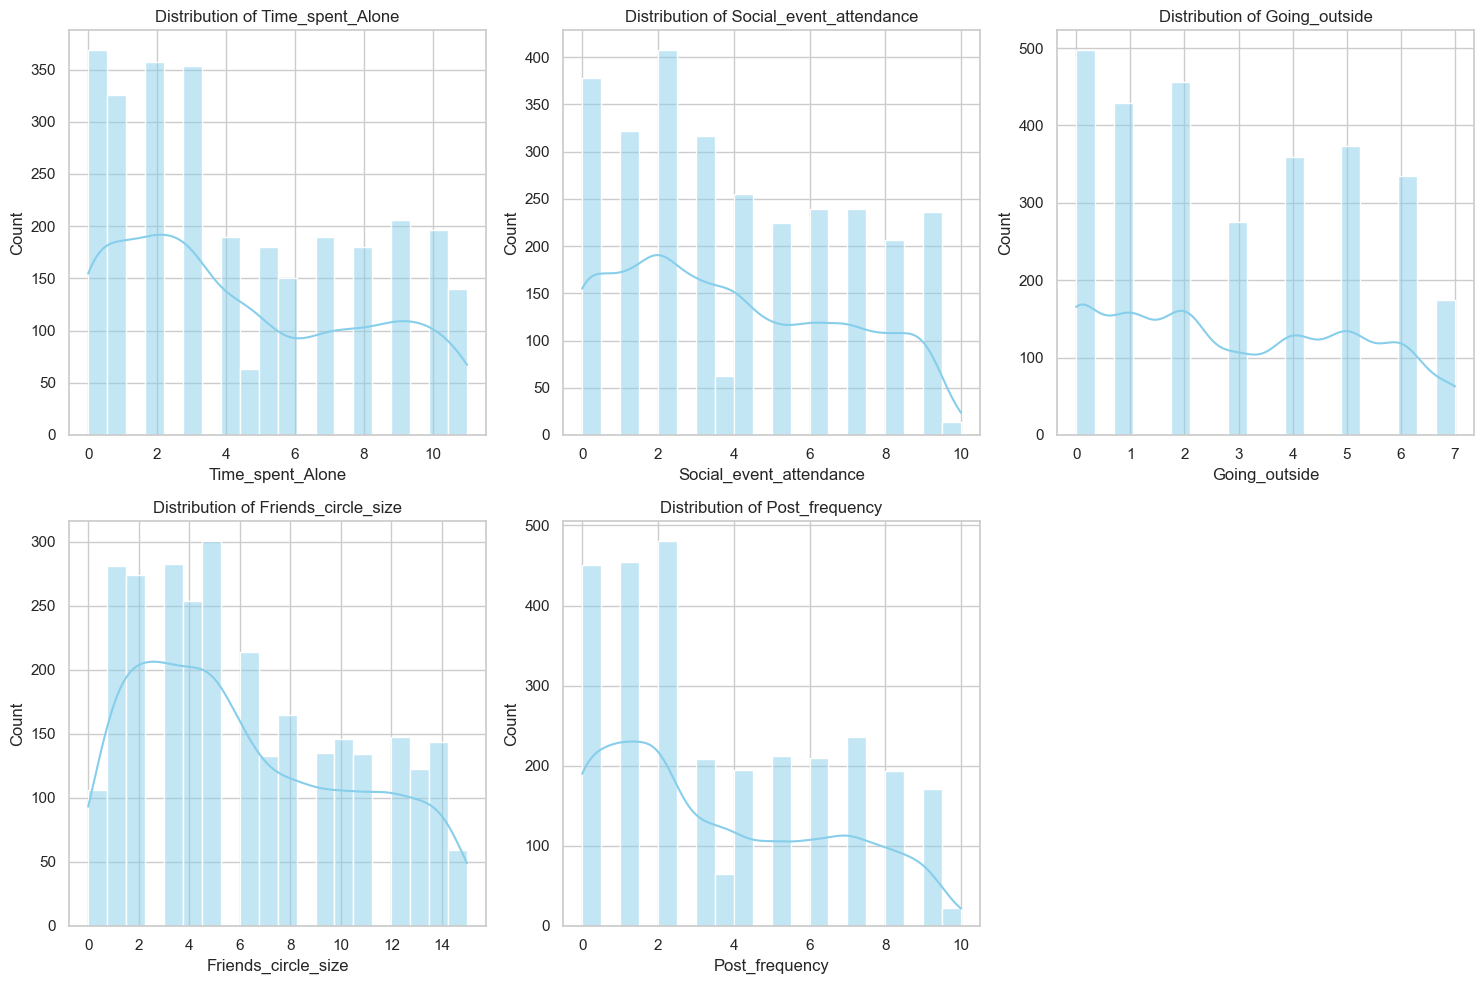

In [8]:
# Mengatur style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# List kolom numerik
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                'Friends_circle_size', 'Post_frequency']

# membuat plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Perbandingan Fitur Numerik Terhadap Personality

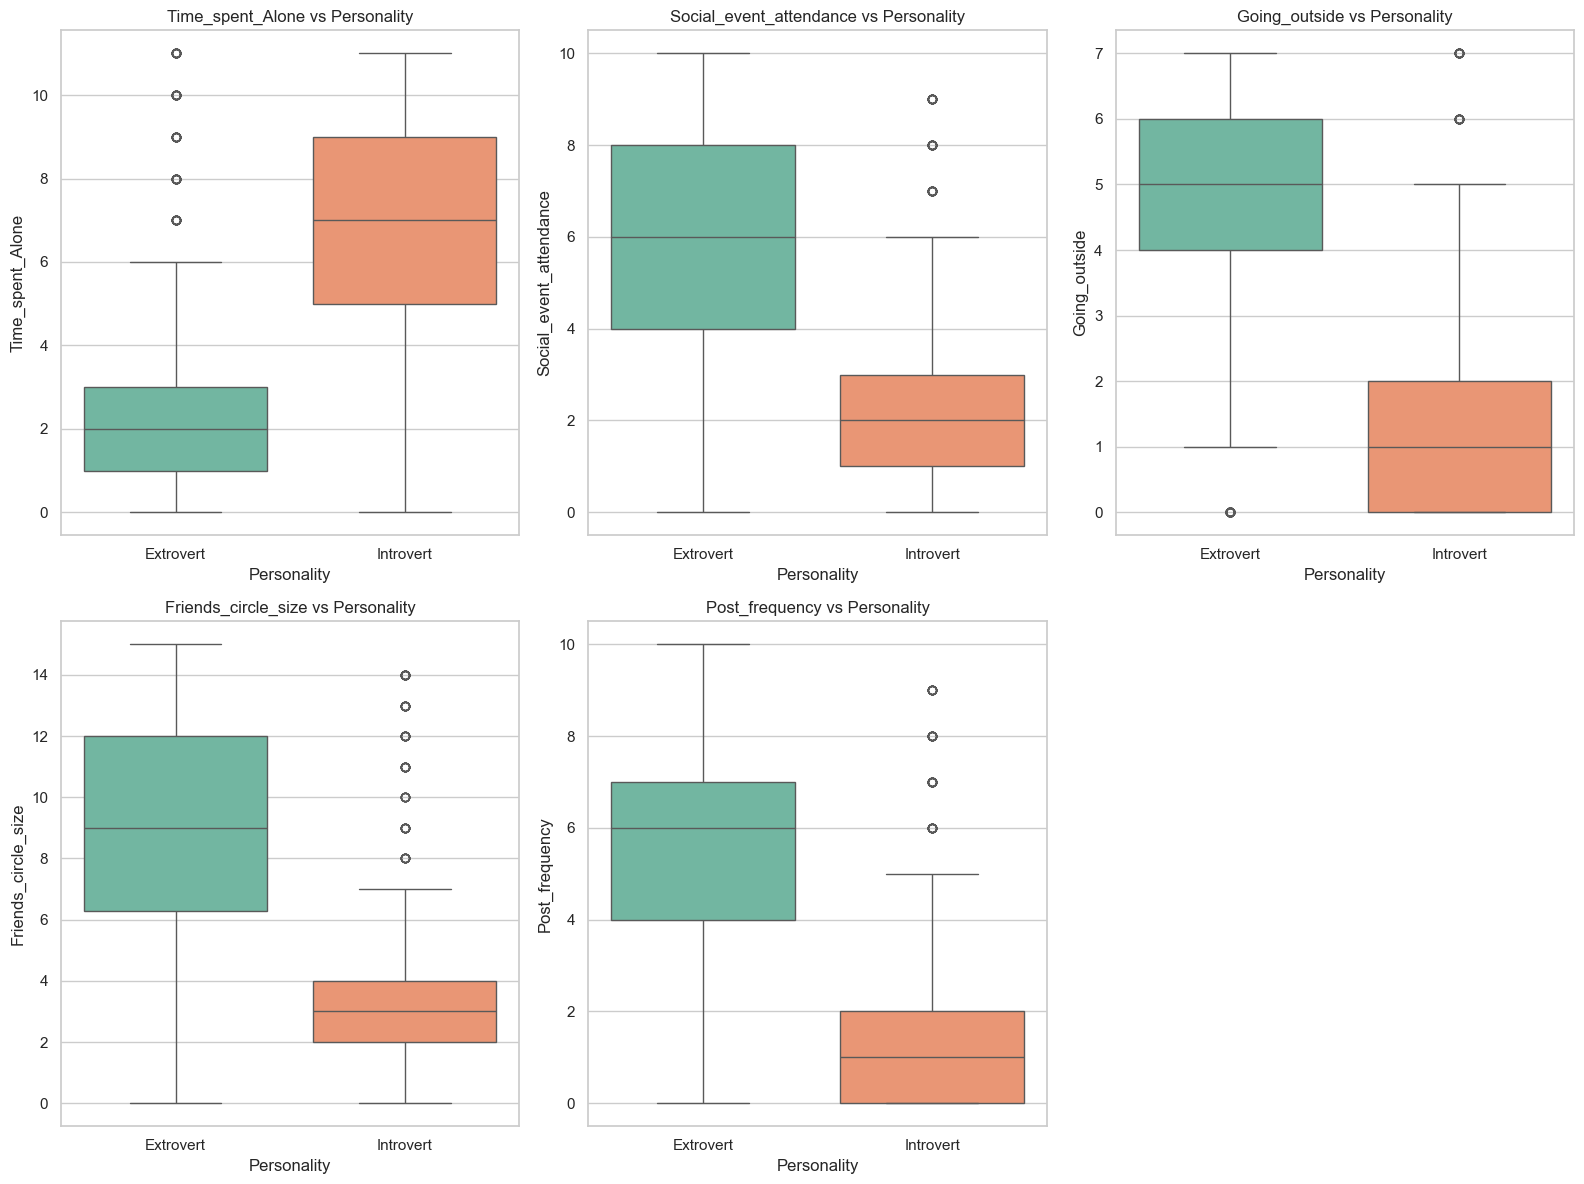

In [9]:
plt.figure(figsize=(16, 12))

# Boxplot untuk tiap fitur numerik terhadap Personality
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Personality', y=col, hue='Personality', data=df, palette='Set2', legend=False)
    plt.title(f'{col} vs Personality')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Menghapus Data Duplikat

In [10]:
# Menghapus Data Duplikat
df_cleaned = df.drop_duplicates()

# Cek kembali duplikat
print(f"Jumlah duplikasi: {df_cleaned.duplicated().sum()}")

Jumlah duplikasi: 0


## Normalisasi Fitur Numerik

In [11]:
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                'Friends_circle_size', 'Post_frequency']

categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

scaler = MinMaxScaler()

# Simpan hasil scaling dalam bentuk DataFrame
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_cleaned[numeric_cols]), 
    columns=numeric_cols, 
    index=df_cleaned.index  # mempertahankan indeks asli
)

# Gabungkan kembali ke df 
df_scaled = pd.concat([df_scaled, df_cleaned[categorical_cols]], axis=1)

df_scaled

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
0,0.363636,0.4,0.857143,0.866667,0.500000,No,No,Extrovert
1,0.818182,0.0,0.000000,0.000000,0.300000,Yes,Yes,Introvert
2,0.818182,0.1,0.285714,0.333333,0.200000,Yes,Yes,Introvert
3,0.000000,0.6,1.000000,0.933333,0.800000,No,No,Extrovert
4,0.272727,0.9,0.571429,0.533333,0.500000,No,No,Extrovert
...,...,...,...,...,...,...,...,...
2894,0.000000,0.9,0.428571,0.800000,0.356473,No,No,Extrovert
2896,0.272727,0.8,0.428571,0.933333,0.900000,No,No,Extrovert
2897,0.363636,0.1,0.142857,0.266667,0.000000,Yes,Yes,Introvert
2898,1.000000,0.1,0.428571,0.133333,0.000000,Yes,Yes,Introvert


## Encoding Data Kategorikal

In [12]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Buat salinan data numerik
df_encoded = df_scaled[numeric_cols].copy()

# Encoding fitur kategorikal dan tambahkan ke df_encoded
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_scaled[col])

# Menampilkan hasil akhir
print(df_encoded.head())

   Time_spent_Alone  Social_event_attendance  Going_outside  \
0          0.363636                      0.4       0.857143   
1          0.818182                      0.0       0.000000   
2          0.818182                      0.1       0.285714   
3          0.000000                      0.6       1.000000   
4          0.272727                      0.9       0.571429   

   Friends_circle_size  Post_frequency  Stage_fear  Drained_after_socializing  \
0             0.866667             0.5           0                          0   
1             0.000000             0.3           1                          1   
2             0.333333             0.2           1                          1   
3             0.933333             0.8           0                          0   
4             0.533333             0.5           0                          0   

   Personality  
0            0  
1            1  
2            1  
3            0  
4            0  


## Menyimpan Hasil preprocessing ke dalam file CSV

In [13]:
df_encoded.to_csv('personality_preprocessing.csv', index=False)